In [44]:
#default_exp simple_cnn_experiment

# Simple CNN Experiment
> Contains results of running simple `cnn` models on `Imagenette` using a few different `lr` schedules

In [45]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config autocompleter.use_jedi = False

In [46]:
#export
from tanhNorm.core import *

In [47]:
#hide
from fastai.vision import *
from fastai import *
from fastai.callbacks import *

# Create Data

We'll use `Imagenette` as a starting Dataset

In [48]:
PATH = untar_data(URLs.IMAGENETTE_320)

In [49]:
PATH.ls()

[PosixPath('/home/ubuntu/.fastai/data/imagenette-320/val'),
 PosixPath('/home/ubuntu/.fastai/data/imagenette-320/train'),
 PosixPath('/home/ubuntu/.fastai/data/imagenette-320/models')]

In [50]:
data = ImageDataBunch.from_folder(PATH, train='train', valid='val', valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224).normalize()

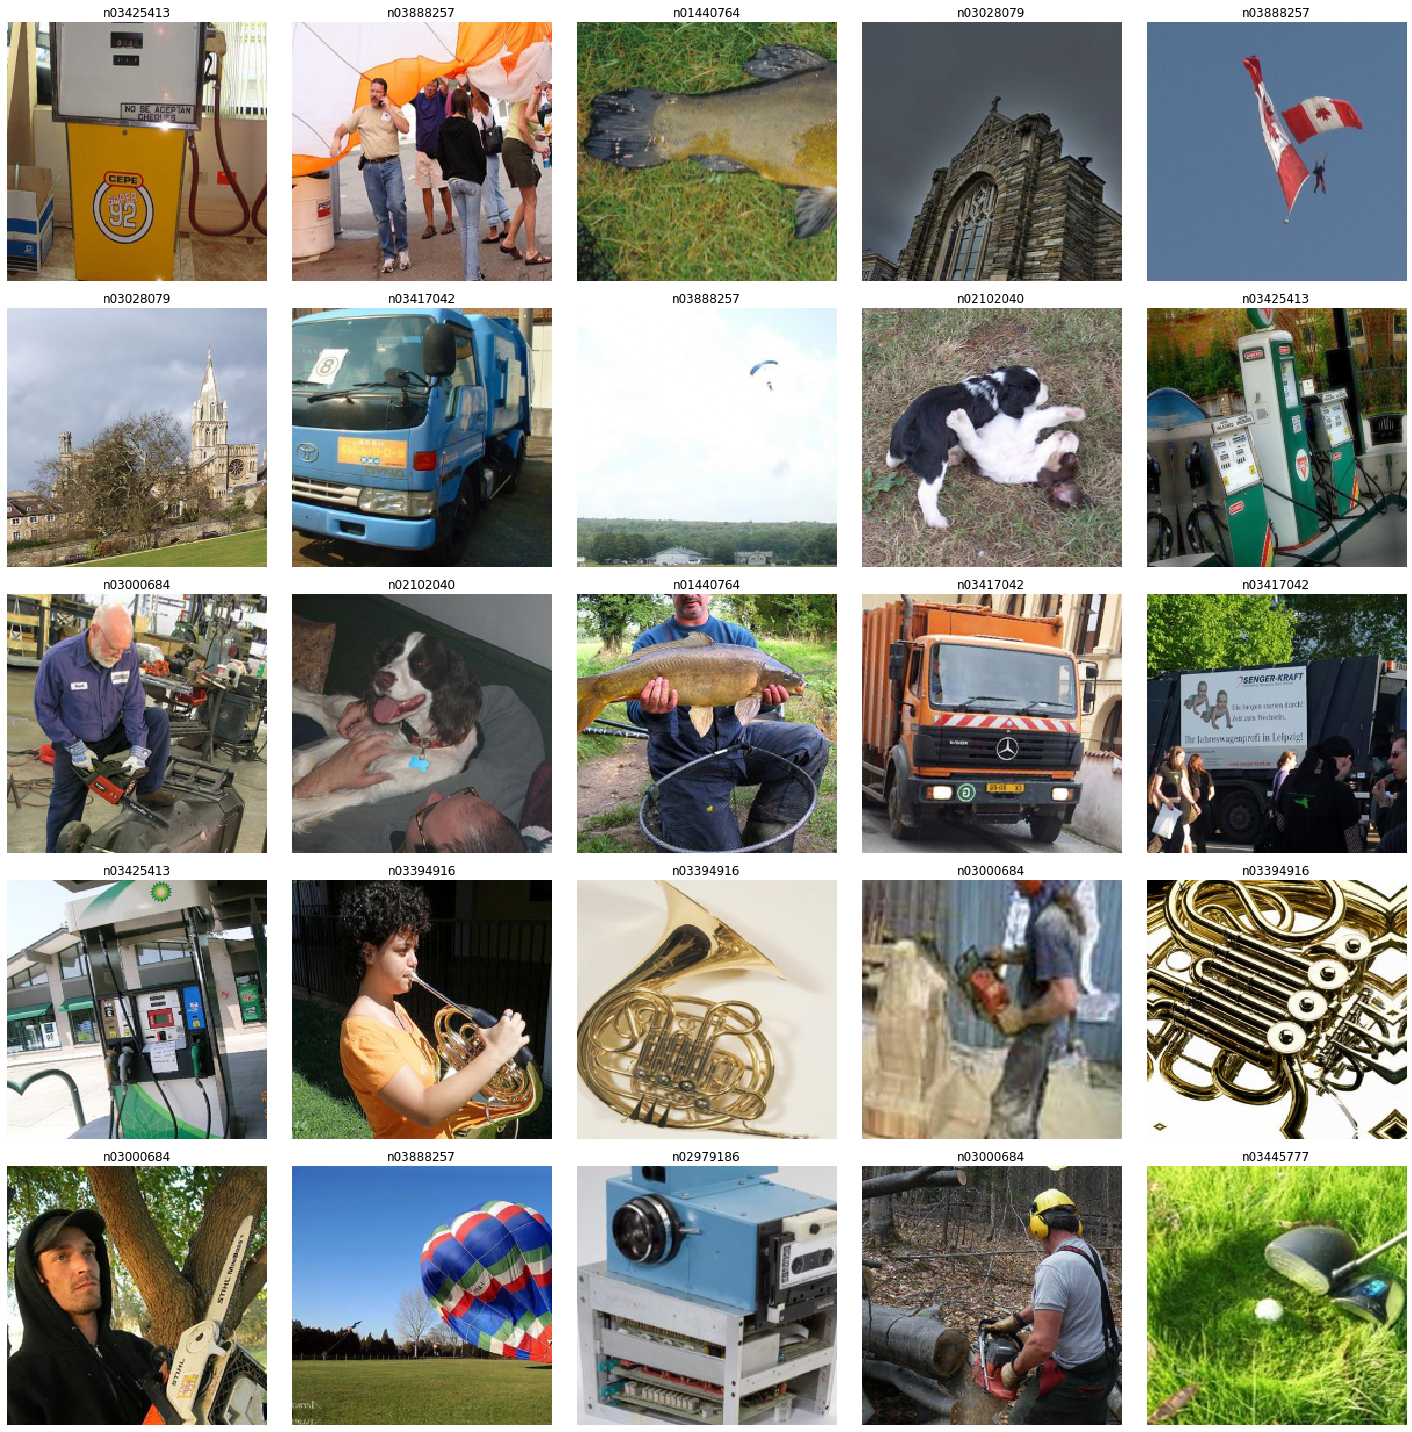

In [51]:
data.show_batch()

# Create Model

In [18]:
a = torch.randn(6, 3, 100, 100)

In [19]:
simple_cnn([3, 4, 16, 64])(a).shape

torch.Size([6, 64])

In [21]:
def get_model(pretrained=False, activations=[3, 4, 16, 64, 128], tanh=True):
    model = simple_cnn(activations, bn=True)
    if tanh: modify_network(model, bn_to_tanh)
    return model

get_model_bn = partial(get_model, tanh=False)

In [22]:
learn   = cnn_learner(data, get_model,    pretrained=False)
learn_bn= cnn_learner(data, get_model_bn, pretrained=False)

In [24]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [4, 112, 112]        108        True      
______________________________________________________________________
ReLU                 [4, 112, 112]        0          False     
______________________________________________________________________
AdjustNormFunc       [4, 112, 112]        0          False     
______________________________________________________________________
Conv2d               [16, 56, 56]         576        True      
______________________________________________________________________
ReLU                 [16, 56, 56]         0          False     
______________________________________________________________________
AdjustNormFunc       [16, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 28, 28]         9,216      True      
___________________________________________________

In [25]:
learn.metrics.append(accuracy)
learn_bn.metrics.append(accuracy)

In [26]:
learn.unfreeze()
learn_bn.unfreeze()

In [27]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.418348,1.692825,0.436520,00:35
1,1.882761,1.520776,0.490291,00:34
2,1.656398,1.313110,0.565347,00:34
3,1.547797,1.240760,0.597087,00:34
4,1.487474,1.216301,0.612397,00:34


In [28]:
learn_bn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.483241,1.688494,0.438013,00:34
1,1.971846,1.533952,0.477969,00:34
2,1.679377,1.390432,0.528006,00:34
3,1.558934,1.302930,0.570948,00:34
4,1.488961,1.284285,0.573936,00:35


---

In [29]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.477854,1.291550,0.573189,00:35
1,1.472673,1.160370,0.619119,00:34
2,1.401934,1.144787,0.626587,00:34
3,1.310635,1.077349,0.648245,00:34
4,1.264315,1.041921,0.669156,00:34


In [30]:
learn_bn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.472726,1.305583,0.559373,00:35
1,1.509111,1.276195,0.573562,00:34
2,1.459255,1.181720,0.609410,00:34
3,1.351536,1.124418,0.630321,00:35
4,1.316544,1.107538,0.634429,00:35


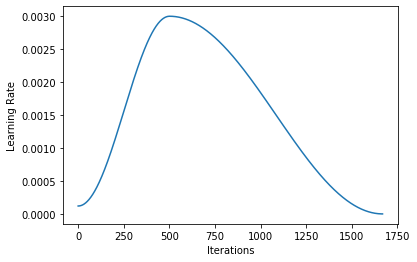

In [58]:
learn.recorder.plot_lr()

# Starting again from scratch

In [31]:
learn_bn = None
learn = None
gc.collect()

56943

In [34]:
learn   = cnn_learner(data, get_model,    pretrained=False)
learn_bn= cnn_learner(data, get_model_bn, pretrained=False)
learn.metrics.append(accuracy)
learn_bn.metrics.append(accuracy)
learn.unfreeze()
learn_bn.unfreeze()

In [33]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.576037,1.724544,0.425317,00:34
1,2.003156,1.556521,0.481329,00:34
2,1.741566,1.434011,0.532487,00:35
3,1.604514,1.297310,0.565347,00:34
4,1.480046,1.215511,0.605302,00:34
5,1.377027,1.139214,0.618372,00:34
6,1.309876,1.105415,0.636669,00:34
7,1.239832,1.063370,0.650859,00:35
8,1.228257,1.038454,0.652353,00:34
9,1.199636,1.034253,0.654593,00:34


In [35]:
learn_bn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.596072,1.767209,0.405153,00:34
1,2.073952,1.581484,0.475355,00:34
2,1.782448,1.461708,0.502240,00:35
3,1.627985,1.335050,0.556012,00:34
4,1.507585,1.262176,0.588125,00:34
5,1.463257,1.178568,0.612771,00:34
6,1.373296,1.118919,0.630695,00:34
7,1.310224,1.090498,0.644511,00:35
8,1.260147,1.073292,0.646004,00:34
9,1.253927,1.068368,0.646004,00:34


So far, the `tanh` version seems to work better

# Construct Callback for Linearly Decreasing LR

In [52]:
def get_linear_sched(start_lr=0.03, end_lr=0.0003, epochs=10, 
                     iters_per_epoch=167, anneal_func=annealing_linear, learn=learn):
    phase = [TrainingPhase(length=iters_per_epoch * epochs)]
    phase[0].schedule_hp('lr' ,(start_lr, end_lr), anneal=anneal_func)
    return GeneralScheduler(learn, phase)

# Let's try VGGNet

In [61]:
def get_vgg_model(pretrained=False, tanh=True):
    model = models.vgg13_bn(pretrained=pretrained)
    if tanh: modify_network(model, bn_to_tanh)
    return model

get_vgg_model_bn = partial(get_vgg_model, tanh=False)

In [54]:
learn_bn = None
learn = None
gc.collect()

55327

In [57]:
learn   = cnn_learner(data, get_vgg_model,    pretrained=False)
learn.metrics.append(accuracy)
learn.unfreeze()

In [58]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,2.269489,2.987965,0.253174,01:00
1,1.762213,3.393715,0.208738,00:56
2,1.432746,1.938531,0.442494,00:56
3,1.188949,1.080845,0.644884,00:56
4,0.981312,0.818569,0.728155,00:56
5,0.812427,0.692577,0.767364,00:56


Trying out a VGG with a BatchNorm layer

In [62]:
learn_bn = None
learn = None
gc.collect()

526

In [63]:
learn_bn   = cnn_learner(data, get_vgg_model_bn,    pretrained=False)
learn_bn.metrics.append(accuracy)
learn_bn.unfreeze()

In [64]:
learn_bn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,2.072667,1.503334,0.538088,00:52
1,1.413684,1.273857,0.624720,00:51
2,1.058149,0.893497,0.716580,00:52
3,0.839290,0.838380,0.709858,00:52
4,0.654746,0.578868,0.810680,00:52
5,0.522245,0.479411,0.847647,00:52


# Now, a longer cycle

In [65]:
learn_bn = None
learn = None
gc.collect()

36

In [66]:
learn   = cnn_learner(data, get_vgg_model,    pretrained=False)
learn.metrics.append(accuracy)
learn.unfreeze()

In [67]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,2.326653,1.840994,0.400672,00:56
1,1.981749,2.451062,0.294996,00:56
2,1.688939,1.677734,0.492158,00:56
3,1.393661,2.852068,0.267364,00:56
4,1.223375,2.102337,0.445855,00:56
5,1.212957,1.664663,0.525765,00:56
6,1.074085,2.328398,0.423077,00:56
7,0.940381,1.333527,0.585512,00:56
8,0.834547,1.042057,0.665049,00:56
9,0.747592,1.055205,0.680732,00:56


Trying out a VGG with a BatchNorm layer

In [68]:
learn_bn = None
learn = None
gc.collect()

50

In [69]:
learn_bn   = cnn_learner(data, get_vgg_model_bn,    pretrained=False)
learn_bn.metrics.append(accuracy)
learn_bn.unfreeze()

In [ ]:
learn_bn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,2.259614,1.473745,0.510082,00:51
1,1.743347,1.286083,0.592606,00:51
2,1.424186,2.170414,0.488051,00:52
3,1.196431,1.141765,0.644884,00:51
4,1.021896,1.275041,0.600075,00:51
5,0.928260,1.069293,0.677371,00:52
6,0.828244,1.108871,0.660568,00:52
7,0.728863,0.833194,0.743465,00:51
8,0.622755,0.626048,0.796490,00:52
9,0.587986,0.849497,0.736370,00:52


In [72]:
learn_bn.validate()

[0.29684407, tensor(0.9100)]